In [1]:
#from fraud_detection import *

import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "\\common")

from classification import *

df = pd.read_csv('creditcard.csv')

print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.221637  0.383930 -1.234899 -1.48

Running  data_preparation
Time elapsed:  0.0
Running  run
Running  data_preparation
Time elapsed:  0.0
Running  preprocessing
Time elapsed:  0.3062012195587158
Running  classifier


C:\Users\Lion Alio\Anaconda3\envs\torch-gpu\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Time elapsed:  101.71835279464722
Running  evaluate
accuracy_score:  0.9992275552122467
confusion matrix for  LogisticRegression :  [[56850    14]
 [   30    68]]


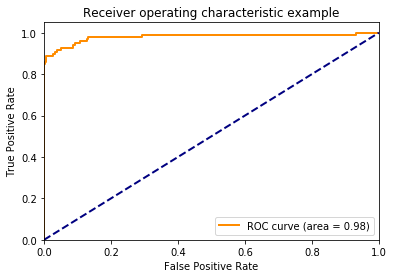

Time elapsed:  0.4949605464935303
Time elapsed:  102.5234854221344
Running  run
Running  data_preparation
Time elapsed:  0.0
Running  preprocessing
Time elapsed:  0.28903698921203613
Running  classifier


C:\Users\Lion Alio\Anaconda3\envs\torch-gpu\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Time elapsed:  512.2990543842316
Running  evaluate
accuracy_score:  0.9995084442259752
confusion matrix for  DecisionTreeClassifier :  [[56857     7]
 [   21    77]]


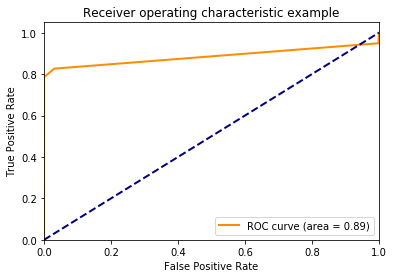

Time elapsed:  0.4059114456176758
Time elapsed:  512.9979934692383


In [2]:

preprocessings = [
    StandardScaler()
]

classifiers = [
    LogisticRegression(solver='lbfgs'),
    DecisionTreeClassifier(),
    #xgb.XGBClassifier()  # Take insanely long time to run. Why???
]

parameters = [
    {
        'penalty': ['l2'],
        'C': [0.1, 0.5, 1., 2.],
        'max_iter': [100, 200, 500, 1000]
    },
    {
        'criterion':['gini','entropy'],
        'max_depth':[5, 8, 10, 20, 50]
    },
    #{
    #    "learning_rate": [0.05, 0.10, 0.15],
    #    "max_depth": [ 3, 5, 8],
    #    "min_child_weight": [ 1, 3, 5],
    #    "gamma":[ 0.0, 0.1, 0.5],
    #    'eval_metric': ['mlogloss']
    #}
]

detector = Classification('creditcard.csv', [f for f in df.columns if f != 'Class' and f != 'Time'], 'Class')

for prep in preprocessings:
    for clf, params in zip(classifiers, parameters):
        detector.set_methods(prep, clf)
        detector.set_parameters(params)
        detector.run()